<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/10324_ROC_1_RE_LE__Fundus_laterality_classification_VGG16_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
os.listdir('/content/drive/MyDrive/fundus laterality28224/fundus laterality images datasets28224/split')

['train', 'val', 'test']

In [ ]:
os.listdir('/content/drive/MyDrive/fundus laterality28224/fundus laterality images datasets28224/split/train')


['LE FUNDUS', 'RE FUNDUS']

In [5]:
import keras
from keras.preprocessing.image import ImageDataGenerator
traindatagen = ImageDataGenerator()
valdatagen = ImageDataGenerator()
testdatagen = ImageDataGenerator()

In [6]:
trainimages = traindatagen.flow_from_directory('/content/drive/MyDrive/fundus laterality28224/fundus laterality images datasets28224/split/train',
                                               target_size=(224,224))

valimages = valdatagen.flow_from_directory('/content/drive/MyDrive/fundus laterality28224/fundus laterality images datasets28224/split/val',
                                           target_size=(224,224))

testimages = testdatagen.flow_from_directory('/content/drive/MyDrive/fundus laterality28224/fundus laterality images datasets28224/split/test',
                                             target_size=(224,224))


Found 30 images belonging to 2 classes.
Found 3 images belonging to 2 classes.
Found 5 images belonging to 2 classes.


In [16]:
VGG = keras.applications.VGG16(include_top=False,
                               weights="imagenet",
                               input_shape=(224,224,3))
VGG.trainable=False


58889256/58889256 [==============================] - 1s 0us/step


In [17]:
from keras.models import Sequential

model = keras.Sequential([
    VGG,
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(2, activation='softmax')])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.fit(trainimages,
          epochs=5,
          batch_size=10,
          validation_data=valimages)
model.save('funduslaterality_model.keras')

Epoch 1/5
1/1 [==============================] - 29s 29s/step - loss: 2.4126 - accuracy: 0.4667 - val_loss: 9.5599 - val_accuracy: 0.3333
Epoch 2/5
1/1 [==============================] - 22s 22s/step - loss: 4.8828 - accuracy: 0.6333 - val_loss: 8.8150 - val_accuracy: 0.6667
Epoch 3/5
1/1 [==============================] - 23s 23s/step - loss: 0.9487 - accuracy: 0.9667 - val_loss: 31.5333 - val_accuracy: 0.6667
Epoch 4/5
1/1 [==============================] - 23s 23s/step - loss: 10.0931 - accuracy: 0.5667 - val_loss: 0.0649 - val_accuracy: 1.0000
Epoch 5/5
1/1 [==============================] - 21s 21s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [ ]:
y_pred = model.predict(testimages)
y_pred

1/1 [==============================] - 1s 588ms/step


array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
y_true = testimages.classes
y_true

array([0, 0, 1, 1, 1], dtype=int32)

In [ ]:
testimages.class_indices

{'LE FUNDUS': 0, 'RE FUNDUS': 1}

In [ ]:
import numpy as np
y_pred1 = np.argmax(y_pred, axis=1)
y_pred1

array([0, 0, 1, 1, 1])

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_true, y_pred1)

array([[2, 0],
       [0, 3]])

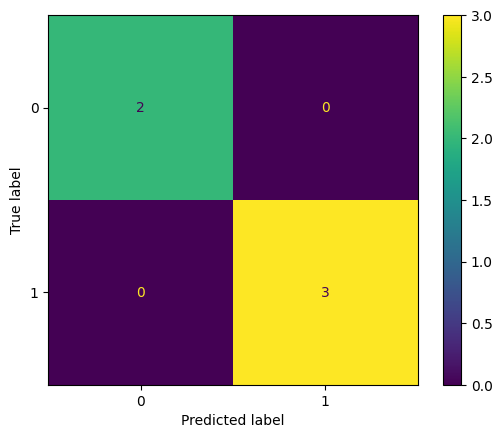

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred1)

In [ ]:
print(metrics.classification_report(y_true, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



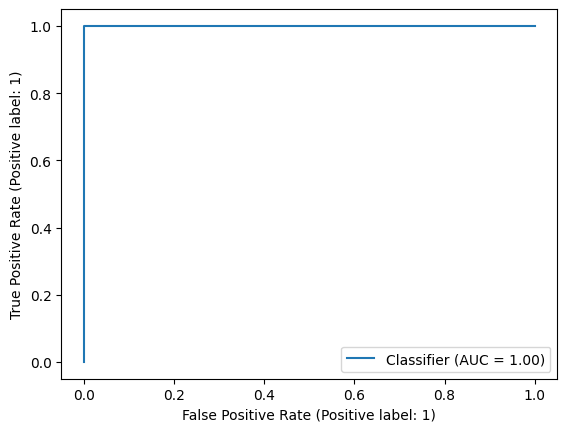

In [ ]:
metrics.RocCurveDisplay.from_predictions(y_true, y_pred1)

1/1 [==============================] - 1s 685ms/step
Prediction: LE fundus


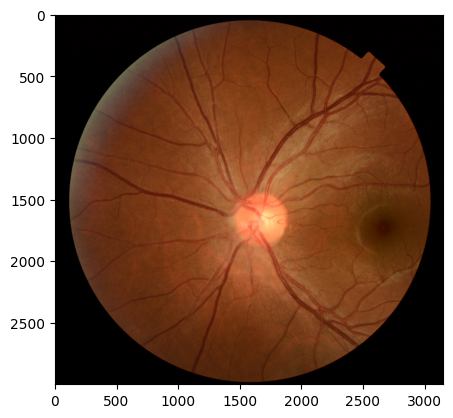

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained CNN model
model = load_model('/content/funduslaterality_model.keras')  # Provide the path to your trained model file

# Define a function to predict unknown images
def predict_unknown_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))  # Assuming images are resized to 150x150
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size
    img_array /= 255.0  # Normalize pixel values

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)  # Get the index of the class with the highest probability
    class_names = ["LE fundus", "RE fundus"]  # Example class names, modify as per your multiclass classes
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name

# Example usage:
unknown_image_path = "/content/drive/MyDrive/fundus laterality28224/fundus laterality images datasets28224/split/test/LE FUNDUS/1ffa9654-8d87-11e8-9daf-6045cb817f5b..JPG" # Provide the path to the unknown image

prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testlaterality = image.load_img('/content/drive/MyDrive/fundus laterality28224/fundus laterality images datasets28224/split/test/LE FUNDUS/1ffa9654-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(testlaterality)



1/1 [==============================] - 1s 554ms/step
Prediction: RE fundus


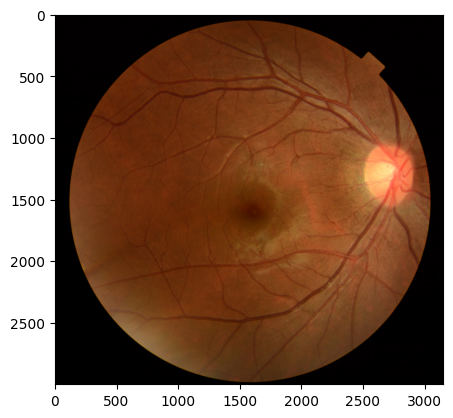

In [24]:
# Example usage
unknown_image_path = "/content/drive/MyDrive/fundus laterality28224/fundus laterality images datasets28224/RE FUNDUS/1ffa9633-8d87-11e8-9daf-6045cb817f5b..JPG"    # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testlaterality = image.load_img('/content/drive/MyDrive/fundus laterality28224/fundus laterality images datasets28224/RE FUNDUS/1ffa9633-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(testlaterality)



In [20]:
testimages.class_indices

{'LE FUNDUS': 0, 'RE FUNDUS': 1}